In [8]:
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt

In [22]:
class Finite_Volume:

    def __init__(self,u0,function, film =False):
        self.fct = function
        self.u0=u0
        self.film = film
    
    def sol(self, J,T,  CFL=0.95):
        dx = 1./J
        space_lapse = np.linspace(0,1,J) +dx
        f = np.empty_like(space_lapse)  

        U = self.u0(space_lapse)
        t=0; n =0
        while t<T and n<1000:
            # print(n,' ',t)
            ## Calcul de la CFL pour n
            vitesse = (U[0]-U[1])/dx
            for j ,x in enumerate(space_lapse[:-1]):
                if((U[j]-U[j+1])/dx > vitesse): vitesse =(U[j-1]-U[j])/dx
                f[j] = self.fct(U[j],U[j+1])
            
            dt = min(CFL * dx * vitesse, T-t)

            ## Calcul de la solution
            for j, x in enumerate(space_lapse[1:]):
                U[j] = U[j] -dt/dx * (f[j]-f[j-1])

            n+=1; t+= dt
        return U

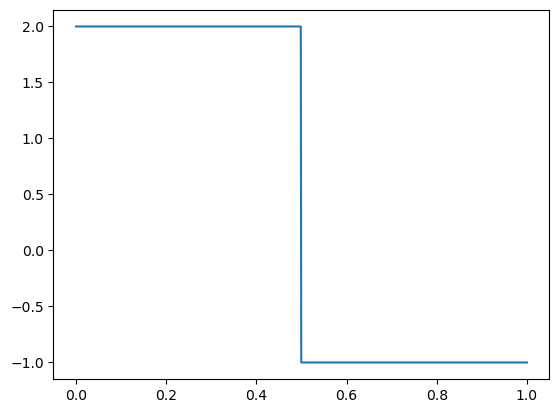

In [28]:
U0  = lambda x: 2*(x<0.5) + -1*(x>0.5)
F   = lambda u,v: -u*v /2

Fv = Finite_Volume(U0,F,False)

J=1000; T=10
U = Fv.sol(J= J,T= T)

X = np.linspace(0,1,J)
plt.plot(X,U)
plt.show()